In [1]:
import pandas as pd

In [3]:
from google.colab import files

uploaded = files.upload()


Saving reviews.csv to reviews.csv
Saving listings_cleaned.csv to listings_cleaned.csv


In [5]:
listings = pd.read_csv('/listings_cleaned.csv')


In [6]:
reviews = pd.read_csv('/reviews.csv')

In [7]:
print("Listings:")
print(listings.head())
print("\nReviews:")
print(reviews.head())

Listings:
       id neighbourhood_cleansed        room_type  accommodates  bathrooms  \
0  271975                Vidigal  Entire home/apt             4        1.0   
1  272335             Copacabana  Entire home/apt             4        1.0   
2  272631             Copacabana     Private room             2        1.0   
3  273261                 Leblon  Entire home/apt             6        3.5   
4  273363           Santa Teresa     Private room             1        1.0   

   bedrooms  beds   price  
0       2.0   2.0   236.0  
1       1.0   1.0   723.0  
2       1.0   2.0  1146.0  
3       3.0   3.0  6742.0  
4       1.0   1.0    61.0  

Reviews:
       id  number_of_reviews  review_scores_rating
0  272335                367                  4.92
1  272631                 32                  5.00
2  273363                  5                  5.00
3  273463                654                  4.83
4  273496                 60                  4.80


In [8]:
print("\nColunas em listings:", listings.columns)
print("Colunas em reviews:", reviews.columns)


Colunas em listings: Index(['id', 'neighbourhood_cleansed', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price'],
      dtype='object')
Colunas em reviews: Index(['id', 'number_of_reviews', 'review_scores_rating'], dtype='object')


In [9]:
df = pd.merge(listings, reviews, on='id', how='inner')

In [10]:
print("\nBase consolidada:")
print(df.head())
print("\nShape:", df.shape)


Base consolidada:
       id neighbourhood_cleansed        room_type  accommodates  bathrooms  \
0  272335             Copacabana  Entire home/apt             4        1.0   
1  272631             Copacabana     Private room             2        1.0   
2  273261                 Leblon  Entire home/apt             6        3.5   
3  273363           Santa Teresa     Private room             1        1.0   
4  273463                  Lagoa  Entire home/apt             6        2.0   

   bedrooms  beds   price  number_of_reviews  review_scores_rating  
0       1.0   1.0   723.0                367              4.920000  
1       1.0   2.0  1146.0                 32              5.000000  
2       3.0   3.0  6742.0                  0              4.812309  
3       1.0   1.0    61.0                  5              5.000000  
4       2.0   6.0  1411.0                654              4.830000  

Shape: (32695, 10)


In [11]:

df.isnull().sum()

,0
id,0
neighbourhood_cleansed,0
room_type,0
accommodates,0
bathrooms,0
bedrooms,0
beds,0
price,0
number_of_reviews,0
review_scores_rating,0


In [12]:
df['bedrooms'].fillna(df['bedrooms'].median(), inplace=True)
df['bathrooms'].fillna(df['bathrooms'].median(), inplace=True)
df['beds'].fillna(df['beds'].median(), inplace=True)

<ipython-input-12-94d06f102dc8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bedrooms'].fillna(df['bedrooms'].median(), inplace=True)
<ipython-input-12-94d06f102dc8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [13]:
df['review_scores_rating'].fillna(df['review_scores_rating'].mean(), inplace=True)


<ipython-input-13-d0000b5402b6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['review_scores_rating'].fillna(df['review_scores_rating'].mean(), inplace=True)


In [14]:
df.dropna(axis=0, inplace=True)

In [15]:
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

In [16]:
colunas_remover = ['name', 'last_review', 'description']
df.drop(columns=[col for col in colunas_remover if col in df.columns], inplace=True)

In [17]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32695 entries, 0 to 32694
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      32695 non-null  int64  
 1   neighbourhood_cleansed  32695 non-null  object 
 2   room_type               32695 non-null  object 
 3   accommodates            32695 non-null  int64  
 4   bathrooms               32695 non-null  float64
 5   bedrooms                32695 non-null  float64
 6   beds                    32695 non-null  float64
 7   price                   32695 non-null  float64
 8   number_of_reviews       32695 non-null  int64  
 9   review_scores_rating    32695 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 2.5+ MB


,id,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating
count,3.269500e+04,32695.00000,32695.000000,32695.000000,32695.000000,32695.000000,32695.000000,32695.000000
mean,6.936934e+17,3.75507,1.390427,1.417250,2.194984,782.973788,24.132100,4.816146
std,5.187758e+17,1.95623,0.736872,0.870945,1.680987,522.337706,46.390162,0.296394
min,1.787800e+04,1.00000,0.000000,0.000000,0.000000,33.000000,0.000000,0.000000
25%,4.311751e+07,2.00000,1.000000,1.000000,1.000000,386.000000,1.000000,4.812309
50%,8.605216e+17,4.00000,1.000000,1.000000,2.000000,671.000000,6.000000,4.830000
75%,1.147848e+18,4.00000,2.000000,2.000000,3.000000,1036.000000,26.000000,5.000000
max,1.320520e+18,16.00000,20.000000,26.000000,50.000000,10000.000000,710.000000,5.000000


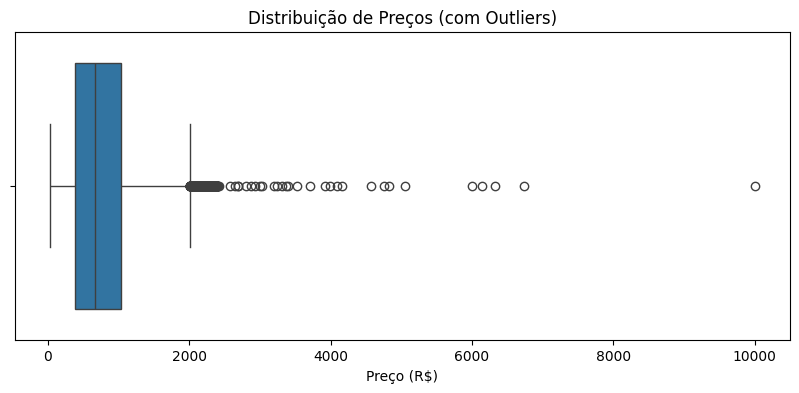

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['price'])
plt.title('Distribuição de Preços (com Outliers)')
plt.xlabel('Preço (R$)')
plt.show()


In [19]:

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Limites aceitáveis de preço: entre R${limite_inferior:.2f} e R${limite_superior:.2f}")

df = df[(df['price'] >= limite_inferior) & (df['price'] <= limite_superior)]


Limites aceitáveis de preço: entre R$-589.00 e R$2011.00


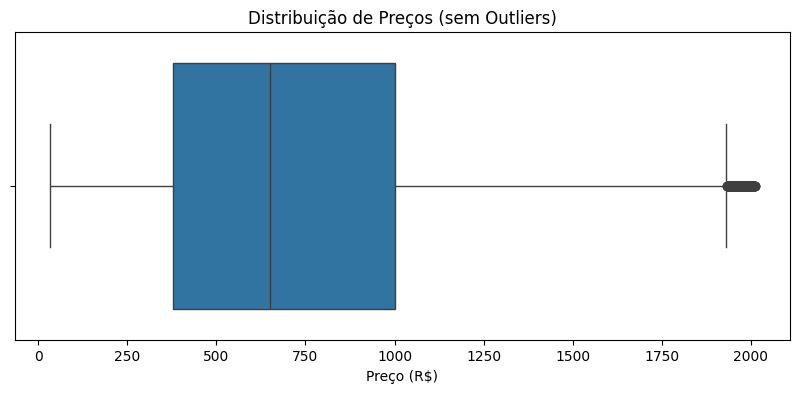

In [20]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['price'])
plt.title('Distribuição de Preços (sem Outliers)')
plt.xlabel('Preço (R$)')
plt.show()

In [21]:
df.select_dtypes(include='object').columns

Index(['neighbourhood_cleansed', 'room_type'], dtype='object')

In [23]:
df['room_type'] = df['room_type'].astype('category').cat.codes
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].astype('category').cat.codes

In [24]:
room_type_map = dict(enumerate(df['room_type'].astype('category').cat.categories))
bairro_map = dict(enumerate(df['neighbourhood_cleansed'].astype('category').cat.categories))

print("Room Type Mapping:", room_type_map)
print("Bairros Mapping:", bairro_map)

Room Type Mapping: {0: 0, 1: 1, 2: 2, 3: 3}
Bairros Mapping: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40, 41: 41, 42: 42, 43: 43, 44: 44, 45: 45, 46: 46, 47: 47, 48: 48, 49: 49, 50: 50, 51: 51, 52: 52, 53: 53, 54: 54, 55: 55, 56: 56, 57: 57, 58: 58, 59: 59, 60: 60, 61: 61, 62: 62, 63: 63, 64: 64, 65: 65, 66: 66, 67: 67, 68: 68, 69: 69, 70: 70, 71: 71, 72: 72, 73: 73, 74: 74, 75: 75, 76: 76, 77: 77, 78: 78, 79: 79, 80: 80, 81: 81, 82: 82, 83: 83, 84: 84, 85: 85, 86: 86, 87: 87, 88: 88, 89: 89, 90: 90, 91: 91, 92: 92, 93: 93, 94: 94, 95: 95, 96: 96, 97: 97, 98: 98, 99: 99, 100: 100, 101: 101, 102: 102, 103: 103, 104: 104, 105: 105, 106: 106, 107: 107, 108: 108, 109: 109, 110: 110, 111: 111, 112: 112, 113: 113, 114: 114, 115: 115

In [25]:
df[['room_type', 'neighbourhood_cleansed']].head()

,room_type,neighbourhood_cleansed
0,0,31
1,2,31
3,2,120
4,0,74
5,0,76


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31772 entries, 0 to 32694
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      31772 non-null  int64  
 1   neighbourhood_cleansed  31772 non-null  int16  
 2   room_type               31772 non-null  int8   
 3   accommodates            31772 non-null  int64  
 4   bathrooms               31772 non-null  float64
 5   bedrooms                31772 non-null  float64
 6   beds                    31772 non-null  float64
 7   price                   31772 non-null  float64
 8   number_of_reviews       31772 non-null  int64  
 9   review_scores_rating    31772 non-null  float64
dtypes: float64(5), int16(1), int64(3), int8(1)
memory usage: 2.3 MB


In [27]:
df.describe()

,id,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating
count,3.177200e+04,31772.000000,31772.000000,31772.000000,31772.0000,31772.000000,31772.000000,31772.000000,31772.000000,31772.000000
mean,6.953748e+17,50.619508,0.425060,3.693252,1.3671,1.387952,2.153311,739.958360,24.112741,4.815979
std,5.186011e+17,36.843779,0.830901,1.899247,0.7119,0.841544,1.626848,457.360796,46.395426,0.297785
min,1.787800e+04,0.000000,0.000000,1.000000,0.0000,0.000000,0.000000,33.000000,0.000000,0.000000
25%,4.345363e+07,31.000000,0.000000,2.000000,1.0000,1.000000,1.000000,379.000000,1.000000,4.812309
50%,8.625607e+17,31.000000,0.000000,4.000000,1.0000,1.000000,2.000000,650.000000,6.000000,4.830000
75%,1.148612e+18,71.000000,0.000000,4.000000,2.0000,2.000000,3.000000,1000.000000,26.000000,5.000000
max,1.320520e+18,151.000000,3.000000,16.000000,20.0000,26.000000,50.000000,2011.000000,710.000000,5.000000


In [28]:
df.columns

Index(['id', 'neighbourhood_cleansed', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'number_of_reviews',
       'review_scores_rating'],
      dtype='object')

In [30]:
df.drop(['id', 'number_of_reviews'], axis=1, inplace=True)


In [31]:
df.head()


,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price,review_scores_rating
0,31,0,4,1.0,1.0,1.0,723.0,4.92
1,31,2,2,1.0,1.0,2.0,1146.0,5.00
3,120,2,1,1.0,1.0,1.0,61.0,5.00
4,74,0,6,2.0,2.0,6.0,1411.0,4.83
5,76,0,6,2.5,2.0,5.0,703.0,4.80
